## Load in Clustered data

In [28]:
%matplotlib inline

In [29]:
import matplotlib.pyplot as plt
import csv
from sklearn import cluster
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")

In [30]:
bound_data = []
file_name = 'data_for_graphs/clustered_bound_data.csv'
data_file = open(file_name, 'r')
rdr = csv.reader(data_file)
for row in rdr:
    bound_data.append([float(obs) for obs in row])

In [31]:
print bound_data[0]

[0.1, 0.1, 1.0, 1.0, 0.0, 0.0, 0.2, 0.2, 0.2, 0.2, 80.0, 57.14912280701755, 3.5009596928982725, 1.0]


In [32]:
lens = [row for row in bound_data if len(row) != 14]

### Plot data

In [33]:
print lens

[]


In [34]:
ratios = [row[-2] for row in bound_data]
ratios_inverse = [1.0/obs for obs in ratios]

In [35]:
print max(ratios_inverse)
print min(ratios)

0.888540738393
1.12544080062


In [36]:
groups = [0, 1, 2]
groups_order = [0, 1, 2]
grouped_ratios = [[ratios_inverse[i] for i in range(len(ratios_inverse)) if bound_data[i][-1] == g] for g in groups_order]

In [37]:
mins = [min(row) for row in grouped_ratios]
maxs = [max(row) for row in grouped_ratios]
print mins
print maxs

[1.978674854082474e-05, 0.2699160434448404, 0.4104542758603699]
[0.26991588956631773, 0.4104541873617059, 0.8885407383934321]


In [38]:
group_means = [round(sum(grouped_ratios[i])/len(grouped_ratios[i]), 4) for i in groups_order]
Group_names = ['A', 'B', 'C']
colours = ['forestgreen', 'orangered', 'darkcyan']
overall_mean = round(sum(ratios_inverse)/len(ratios_inverse), 4)
labs = ['Group ' + Group_names[i] + ', mean = ' + str(group_means[i]) for i in range(len(Group_names))]
labs_order = [labs[0], labs[1], labs[2]]

In [69]:
A = [maxs[i] - mins[i] for i in range(3)]
B = [3*(obs/min(A)) for obs in A]
print B

[5.761341980809828, 3.0, 10.205481214036906]


In [70]:
num_bins = [6, 3, 10]
bins = [[mins[g] + i*(maxs[g]-mins[g])/float(num_bins[g]) for i in range(num_bins[g]+1)] for g in groups]
print bins

[[1.978674854082474e-05, 0.04500247055150365, 0.08998515435446647, 0.1349678381574293, 0.17995052196039213, 0.22493320576335493, 0.26991588956631773], [0.2699160434448404, 0.3167620914171289, 0.3636081393894174, 0.4104541873617059], [0.4104542758603699, 0.45826292211367614, 0.5060715683669823, 0.5538802146202886, 0.6016888608735947, 0.649497507126901, 0.6973061533802072, 0.7451147996335135, 0.7929234458868196, 0.8407320921401258, 0.8885407383934321]]


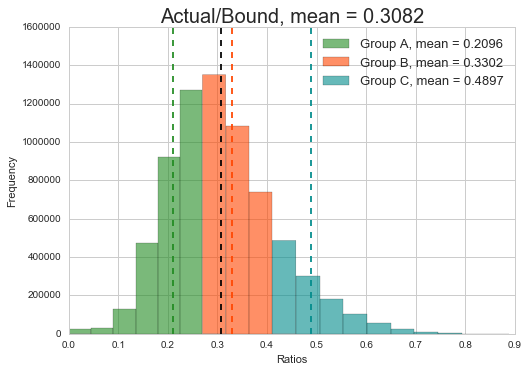

In [73]:
width = 1.0/20.0
fig, ax = plt.subplots()
for i in range(3):
    plt.hist(grouped_ratios[i], bins=bins[i], alpha=0.6, color=colours[i], label=labs[i])
plt.xlabel('Ratios')
plt.ylabel('Frequency')
plt.legend(labs_order, fontsize=13)
ax.set_title('Actual/Bound, mean = ' + str(overall_mean), fontsize=20)
plt.vlines(group_means, 0, 1600000, color=[colours[i] for i in groups_order], linestyle="dashed")
plt.vlines(overall_mean, 0, 1600000, color='black', linestyle="dashed")
plt.show()